In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
from numpy import random, linalg

def random_ball(num_points, dimension, radius=1):
    # First generate random directions by normalizing the length of a
    # vector of random-normal values (these distribute evenly on ball).
    random_directions = random.normal(size=(dimension,num_points))
    random_directions /= linalg.norm(random_directions, axis=0)
    # Second generate a random radius with probability proportional to
    # the surface area of a ball with a given radius.
    random_radii = random.random(num_points) ** (1/dimension)
    # Return the list of random (direction & length) points.
    return radius * (random_directions * random_radii).T

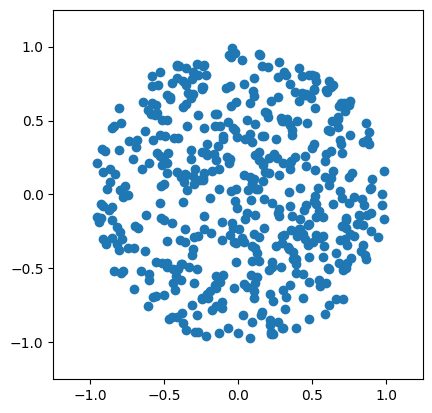

In [22]:
points = random_ball(500,2).T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(points[0], points[1])
plt.xlim([-1.25,1.25])
plt.ylim([-1.25,1.25])
ax.set_aspect('equal')
plt.show()

In [23]:
random_ball(10,3,radius=1)

array([[ 0.633233  ,  0.29420871,  0.26785927],
       [-0.2046685 ,  0.44781254,  0.17173268],
       [-0.23081848,  0.10383532, -0.80330364],
       [-0.52886615,  0.54584369, -0.19530647],
       [ 0.35991611,  0.70465277, -0.4134273 ],
       [-0.2683034 ,  0.14506534, -0.62544505],
       [ 0.74574032,  0.25727088, -0.29010997],
       [ 0.63494517, -0.57614235, -0.01959542],
       [-0.42575167,  0.17920492, -0.79223498],
       [ 0.63083071,  0.54293605, -0.14739416]])

In [52]:
hbar = 1.05457 * 10 ** (-34)
gamma_e = 2 * np.pi * 28000 * 10**6
a0 = np.sqrt(3) * 0.3567 / 4
nm=10**-9
um=10**-6
mm=10**-3
MHz=10**6
GHz=10**9
kHz=10**3

# J0 = 2 * pi * 52 MHz nm^3 in Davis, Ye, Machado 2023
J0_raw = (10**-7) * hbar * (gamma_e ** 2)
J0 = J0_raw / (nm**3) / MHz / (2*np.pi)
J0

51.948300438436206

In [43]:
def aniso_part(r1, r2):
    dr = r2-r1
    cos = dr[2] / np.sqrt(dr @ dr)
    return 1 - 3 * cos**2

In [44]:
aniso_part(np.array([0,0,0]), np.array([0,0,1]))

-2.0

In [45]:
aniso_part(np.array([0,0,0]), np.array([0,0,1]))

-2.0

In [46]:
aniso_part(np.array([0,0,0]), np.array([1,1,1]))

-2.220446049250313e-16

In [92]:
def coupling(r1,r2):
    r"""
    dipolar coupling strength between two electron spins located at
    points r1 and r2, which are in units of nm. The coupling is returned
    in units of Mrad/s = 2*pi*MHz
    """
    dr = r2-r1
    d = np.sqrt(dr @ dr)
    if d < 1e-15:
        return 0
    cos = dr[2] / d
    return J0 * aniso_part(r1,r2) / d ** 3

In [93]:
# at 1 ppm NV centers, that's one NV per 5673.08 nm^3
# at 2 ppm NV venters, that's one NV per ~2800 nm^3
# that's a spherical radius of ~ 6 nm
# for each NV, there are 17.66 P1s. So we should place ~18 P1s 
# within an NV volume, probably?
ppm_density = 1e6 / ( 8 / (0.3567**3))
V18 = 0.5 * ppm_density
# expected volume for only 10 P1 centers to occur
V10 = (10/18) * V18
# radius of this spherical volume
r10 = ((1/(4*np.pi)) * V10)**(1/3)
r10

5.005363919605472

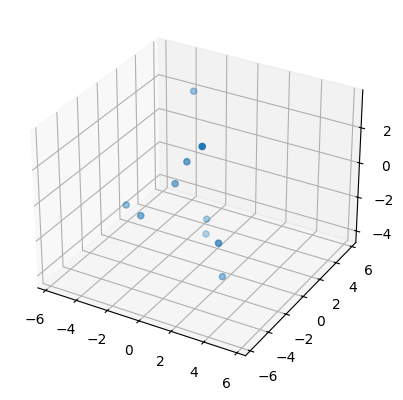

In [135]:
points = random_ball(10,3, radius=5.005363919605472).T

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[0], points[1], points[2])
plt.xlim([-6.25,6.25])
plt.ylim([-6.25,6.25])
plt.show()

# assert generated distribution is not closer than nearest neighbor distance
dr = np.array([[np.linalg.norm(point1 - point2) for point1 in points.T] for point2 in points.T])
for val in dr.flatten():
    assert val < 1e-15 or val > 5 * a0 

In [139]:
5*a0

0.7722781538247732

In [136]:
J = np.array([[coupling(point1, point2) for point1 in points.T] for point2 in points.T])
np.max(J)

14.87213461752246

In [137]:
dr

array([[0.        , 6.75349895, 1.51478779, 4.80153423, 4.5770867 ,
        5.91109262, 4.29161898, 3.07316251, 6.43459348, 6.94077532],
       [6.75349895, 0.        , 5.80786928, 7.1911761 , 6.46974055,
        5.25108296, 3.08378038, 4.17860311, 7.68230894, 6.1468094 ],
       [1.51478779, 5.80786928, 0.        , 4.39138068, 4.14072499,
        4.61050808, 3.71587175, 2.46996731, 5.46101152, 7.24883602],
       [4.80153423, 7.1911761 , 4.39138068, 0.        , 0.83834298,
        3.73719779, 4.74515848, 3.80393748, 2.90873508, 7.33614212],
       [4.5770867 , 6.46974055, 4.14072499, 0.83834298, 0.        ,
        3.56576647, 3.96973396, 3.13624567, 3.33940371, 6.57177749],
       [5.91109262, 5.25108296, 4.61050808, 3.73719779, 3.56576647,
        0.        , 4.47951333, 4.04240711, 2.58464867, 8.48167095],
       [4.29161898, 3.08378038, 3.71587175, 4.74515848, 3.96973396,
        4.47951333, 0.        , 1.40002052, 6.20742406, 4.41607445],
       [3.07316251, 4.17860311, 2.4699673

In [116]:
J

array([[ 0.00000000e+00,  2.70163726e+00, -1.31573976e-01,
        -1.05580039e+00, -3.48671606e-02, -2.12707226e-01,
         5.83932602e+02,  9.17204464e-02, -4.39614321e-01,
         4.46435681e-02],
       [ 2.70163726e+00,  0.00000000e+00, -3.92730210e-01,
        -3.71450357e-01, -2.40557490e-01, -7.48546956e-02,
         2.02596740e+00,  1.05806398e-01, -8.93152824e-01,
         5.14244891e-02],
       [-1.31573976e-01, -3.92730210e-01,  0.00000000e+00,
         3.09865938e-01,  2.73639339e-01,  2.19788685e-01,
        -1.16915568e-01, -1.34334202e-01,  7.44086782e-01,
         8.19167630e-02],
       [-1.05580039e+00, -3.71450357e-01,  3.09865938e-01,
         0.00000000e+00,  5.85760638e-01, -4.68708816e-01,
        -1.18436823e+00,  1.97021335e-01,  1.11967028e+00,
         6.52473443e-01],
       [-3.48671606e-02, -2.40557490e-01,  2.73639339e-01,
         5.85760638e-01,  0.00000000e+00,  1.89283596e-01,
        -3.71290944e-02, -3.40854093e+00,  4.97819358e-01,
         2.